In [ ]:
%%capture
!pip install gymnasium pygame swig box2d -q

In [ ]:
# https://gymnasium.farama.org/environments/classic_control/mountain_car_continuous/

In [ ]:
import gymnasium as gym
from gym.wrappers import RecordVideo

import numpy as np
import torch
from agent import DDPGAgent
from utils import running_mean, save_agent, load_agent

import os
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
os.makedirs('images', exist_ok=True)
os.makedirs('video', exist_ok=True)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

env = gym.make("MountainCarContinuous-v0", render_mode="rgb_array")

FC_SIZE = 64
BATCH_SIZE = 128
GAMMA = 0.99
Q_RL = 0.005
MU_RL = 0.005
TAU = 0.002
MEMORY_LENGTH = 20000
MU = np.zeros(1)
SIGMA = np.ones(1)*0.3
THETA = 0.15
DT = 1e-1
X0 = None

agent = DDPGAgent(env,
                  device,
                  FC_SIZE,
                  BATCH_SIZE,
                  GAMMA,
                  Q_RL,
                  MU_RL,
                  TAU,
                  MEMORY_LENGTH,
                  MU,
                  SIGMA,
                  THETA,
                  DT,
                  X0)

print('State space:', agent.state_n)
print('Action space:', agent.action_n)

State space: 2
Action space: 1


In [ ]:
episodes = 500
max_iter = 1000
lookback = 200
threshold = 90
scores, steps = [], []

for i in tqdm(range(0, episodes)):

    s = env.reset()[0]
    done = False
    cum_reward = 0
    n_steps = 0

    for j in range(max_iter):
        a = agent.choose_action(s)
        s_next, r, terminated, truncated, _ = env.step([a])
        done = terminated or truncated
        if done:
            s_next = None
        agent.learn(s, a, r, s_next, done)
        cum_reward += r
        n_steps += 1
        s = s_next
        if done:
            break

    print("Episode {} reward: {}".format(i, cum_reward))

    scores.append(cum_reward)
    steps.append(n_steps)

    if np.mean(scores[-lookback:]) > threshold:
        print(f'MountainCarContinuous-v0 game successfully solved with an average score of {np.mean(scores[-lookback:]):.2f}')
        save_agent(agent)
        break

  0%|          | 1/500 [00:00<08:14,  1.01it/s]

Episode 0 reward: 81.29032420782735


  0%|          | 2/500 [00:02<08:44,  1.05s/it]

Episode 1 reward: 70.84246508696764


  1%|          | 3/500 [00:04<13:34,  1.64s/it]

Episode 2 reward: 54.26770491088717


  1%|          | 4/500 [00:08<20:16,  2.45s/it]

Episode 3 reward: -36.08359662287117


  1%|          | 5/500 [00:11<22:38,  2.75s/it]

Episode 4 reward: -43.444965584051225


  1%|          | 6/500 [00:14<23:56,  2.91s/it]

Episode 5 reward: -28.864036725630964


  1%|▏         | 7/500 [00:17<23:01,  2.80s/it]

Episode 6 reward: 67.08034039116687


  2%|▏         | 8/500 [00:20<25:19,  3.09s/it]

Episode 7 reward: -20.73475189831083


  2%|▏         | 9/500 [00:24<25:46,  3.15s/it]

Episode 8 reward: -25.3618169356749


  2%|▏         | 10/500 [00:27<26:00,  3.18s/it]

Episode 9 reward: -24.47073402048749


  2%|▏         | 11/500 [00:31<28:00,  3.44s/it]

Episode 10 reward: 80.71048669135938


  2%|▏         | 12/500 [00:33<23:25,  2.88s/it]

Episode 11 reward: 79.986787217519


  3%|▎         | 13/500 [00:33<17:46,  2.19s/it]

Episode 12 reward: 95.56960077140108


  3%|▎         | 14/500 [00:34<15:29,  1.91s/it]

Episode 13 reward: 80.2902208495687


  3%|▎         | 15/500 [00:35<12:06,  1.50s/it]

Episode 14 reward: 92.22335146794431


  3%|▎         | 16/500 [00:36<10:23,  1.29s/it]

Episode 15 reward: 80.83231178443657


  3%|▎         | 17/500 [00:36<08:17,  1.03s/it]

Episode 16 reward: 92.28366566719885


  4%|▎         | 18/500 [00:37<06:58,  1.15it/s]

Episode 17 reward: 94.88288248562908


  4%|▍         | 19/500 [00:37<06:43,  1.19it/s]

Episode 18 reward: 90.63043927856656


  4%|▍         | 20/500 [00:38<06:24,  1.25it/s]

Episode 19 reward: 93.52486761749496


  4%|▍         | 21/500 [00:39<05:28,  1.46it/s]

Episode 20 reward: 93.49082997049896


  4%|▍         | 22/500 [00:39<05:56,  1.34it/s]

Episode 21 reward: 88.6664149163538


  5%|▍         | 23/500 [00:40<05:52,  1.35it/s]

Episode 22 reward: 88.89795269511873


  5%|▍         | 24/500 [00:41<05:51,  1.35it/s]

Episode 23 reward: 94.53661391694641


  5%|▌         | 25/500 [00:43<08:49,  1.11s/it]

Episode 24 reward: 87.67195446168174


  5%|▌         | 26/500 [00:43<07:04,  1.12it/s]

Episode 25 reward: 94.84570381243286


  5%|▌         | 27/500 [00:44<05:56,  1.33it/s]

Episode 26 reward: 90.96359165757765


  6%|▌         | 28/500 [00:44<05:21,  1.47it/s]

Episode 27 reward: 93.65249562166719


  6%|▌         | 29/500 [00:45<04:52,  1.61it/s]

Episode 28 reward: 92.14976884264073


  6%|▌         | 30/500 [00:45<04:35,  1.70it/s]

Episode 29 reward: 92.2488737569844


  6%|▌         | 31/500 [00:46<04:51,  1.61it/s]

Episode 30 reward: 91.5216427628895


  6%|▋         | 32/500 [00:46<04:42,  1.65it/s]

Episode 31 reward: 93.70295875916436


  7%|▋         | 33/500 [00:47<03:54,  1.99it/s]

Episode 32 reward: 95.10490545778617


  7%|▋         | 34/500 [00:47<04:09,  1.87it/s]

Episode 33 reward: 87.36592925727136


  7%|▋         | 35/500 [00:48<03:46,  2.06it/s]

Episode 34 reward: 93.82877348342504


  7%|▋         | 36/500 [00:48<03:29,  2.22it/s]

Episode 35 reward: 93.41778055621201


  7%|▋         | 37/500 [00:49<03:58,  1.94it/s]

Episode 36 reward: 92.54691017331545


  8%|▊         | 38/500 [00:50<04:50,  1.59it/s]

Episode 37 reward: 92.1105431483683


  8%|▊         | 39/500 [00:50<04:16,  1.79it/s]

Episode 38 reward: 90.92899903998108


  8%|▊         | 40/500 [00:50<03:48,  2.01it/s]

Episode 39 reward: 92.57463700641328


  8%|▊         | 41/500 [00:51<03:51,  1.98it/s]

Episode 40 reward: 95.11123711127772


  8%|▊         | 42/500 [00:51<03:29,  2.18it/s]

Episode 41 reward: 92.12541476912558


  9%|▊         | 43/500 [00:52<03:55,  1.94it/s]

Episode 42 reward: 89.53351490764945


  9%|▉         | 44/500 [00:52<03:41,  2.06it/s]

Episode 43 reward: 92.355568409861


  9%|▉         | 45/500 [00:53<03:28,  2.18it/s]

Episode 44 reward: 94.98398807846563


  9%|▉         | 46/500 [00:53<03:19,  2.28it/s]

Episode 45 reward: 93.79870295285201


  9%|▉         | 47/500 [00:54<03:22,  2.23it/s]

Episode 46 reward: 94.754532343534


 10%|▉         | 48/500 [00:54<03:50,  1.96it/s]

Episode 47 reward: 93.654949061947


 10%|▉         | 49/500 [00:55<03:49,  1.97it/s]

Episode 48 reward: 91.98799444757766


 10%|█         | 50/500 [00:55<04:02,  1.86it/s]

Episode 49 reward: 91.4087892512448


 10%|█         | 51/500 [00:56<04:15,  1.76it/s]

Episode 50 reward: 93.36237750196767


 10%|█         | 52/500 [00:56<03:55,  1.90it/s]

Episode 51 reward: 89.87089857133171


 11%|█         | 53/500 [00:57<04:14,  1.76it/s]

Episode 52 reward: 94.99179258778646


 11%|█         | 54/500 [00:58<04:53,  1.52it/s]

Episode 53 reward: 90.12406180557852


 11%|█         | 55/500 [00:59<06:46,  1.10it/s]

Episode 54 reward: 78.67260892297692


 11%|█         | 56/500 [01:00<06:11,  1.20it/s]

Episode 55 reward: 89.52306653379212


 11%|█▏        | 57/500 [01:01<06:16,  1.18it/s]

Episode 56 reward: 90.2579735129935


 12%|█▏        | 58/500 [01:01<05:20,  1.38it/s]

Episode 57 reward: 90.23119493296339


 12%|█▏        | 59/500 [01:02<05:59,  1.23it/s]

Episode 58 reward: 88.19893070928208


 12%|█▏        | 60/500 [01:03<05:39,  1.30it/s]

Episode 59 reward: 92.26225425424157


 12%|█▏        | 61/500 [01:04<06:00,  1.22it/s]

Episode 60 reward: 91.1147277781935


 12%|█▏        | 62/500 [01:06<07:25,  1.02s/it]

Episode 61 reward: 91.69257498026504


 13%|█▎        | 63/500 [01:07<08:09,  1.12s/it]

Episode 62 reward: 73.35403899231224


 13%|█▎        | 64/500 [01:08<07:56,  1.09s/it]

Episode 63 reward: 90.82868827752469


 13%|█▎        | 65/500 [01:09<07:07,  1.02it/s]

Episode 64 reward: 92.54212831430128


 13%|█▎        | 66/500 [01:09<05:48,  1.24it/s]

Episode 65 reward: 94.0782233555687


 13%|█▎        | 67/500 [01:10<05:24,  1.34it/s]

Episode 66 reward: 89.38887982327121


 14%|█▎        | 68/500 [01:11<06:01,  1.19it/s]

Episode 67 reward: 89.98029774072474


 14%|█▍        | 69/500 [01:12<06:07,  1.17it/s]

Episode 68 reward: 87.60375538840526


 14%|█▍        | 70/500 [01:12<05:42,  1.26it/s]

Episode 69 reward: 92.67139860912901


 14%|█▍        | 71/500 [01:13<05:10,  1.38it/s]

Episode 70 reward: 90.73911976070409


 14%|█▍        | 72/500 [01:14<05:45,  1.24it/s]

Episode 71 reward: 80.69927558386709


 15%|█▍        | 73/500 [01:14<05:13,  1.36it/s]

Episode 72 reward: 91.66518489123652


 15%|█▍        | 74/500 [01:15<04:40,  1.52it/s]

Episode 73 reward: 91.66445221425184


 15%|█▌        | 75/500 [01:16<06:02,  1.17it/s]

Episode 74 reward: 87.82576845986081


 15%|█▌        | 76/500 [01:17<05:11,  1.36it/s]

Episode 75 reward: 89.51659983881416


 15%|█▌        | 77/500 [01:17<05:15,  1.34it/s]

Episode 76 reward: 92.5635125842833


 16%|█▌        | 78/500 [01:18<04:45,  1.48it/s]

Episode 77 reward: 87.80812009985434


 16%|█▌        | 79/500 [01:19<05:27,  1.29it/s]

Episode 78 reward: 83.68693324449839


 16%|█▌        | 80/500 [01:19<04:53,  1.43it/s]

Episode 79 reward: 92.48960339938833


 16%|█▌        | 81/500 [01:21<05:41,  1.23it/s]

Episode 80 reward: 92.88409619645765


 16%|█▋        | 82/500 [01:21<05:21,  1.30it/s]

Episode 81 reward: 87.97488282544906


 17%|█▋        | 83/500 [01:22<05:03,  1.37it/s]

Episode 82 reward: 89.31557282422412


 17%|█▋        | 84/500 [01:22<04:29,  1.55it/s]

Episode 83 reward: 92.68812991073774


 17%|█▋        | 85/500 [01:23<04:13,  1.64it/s]

Episode 84 reward: 89.4245546306493


 17%|█▋        | 86/500 [01:24<04:28,  1.54it/s]

Episode 85 reward: 86.33776869472075


 17%|█▋        | 87/500 [01:24<04:00,  1.72it/s]

Episode 86 reward: 90.43378114074412


 18%|█▊        | 88/500 [01:24<03:43,  1.85it/s]

Episode 87 reward: 94.55418578989332


 18%|█▊        | 89/500 [01:25<03:26,  1.99it/s]

Episode 88 reward: 90.13716687553527


 18%|█▊        | 90/500 [01:25<03:17,  2.07it/s]

Episode 89 reward: 90.70703125394377


 18%|█▊        | 91/500 [01:26<03:12,  2.12it/s]

Episode 90 reward: 93.51416501647022


 18%|█▊        | 92/500 [01:26<03:05,  2.19it/s]

Episode 91 reward: 89.2430538169689


 19%|█▊        | 93/500 [01:27<03:03,  2.22it/s]

Episode 92 reward: 93.19079458940976


 19%|█▉        | 94/500 [01:27<03:27,  1.96it/s]

Episode 93 reward: 95.50235377869413


 19%|█▉        | 95/500 [01:28<03:23,  1.99it/s]

Episode 94 reward: 89.5112237302288


 19%|█▉        | 96/500 [01:28<03:10,  2.12it/s]

Episode 95 reward: 89.99127509524496


 19%|█▉        | 97/500 [01:29<03:06,  2.17it/s]

Episode 96 reward: 89.84802818072048


 20%|█▉        | 98/500 [01:29<02:58,  2.25it/s]

Episode 97 reward: 90.0594150081757


 20%|█▉        | 99/500 [01:30<03:08,  2.12it/s]

Episode 98 reward: 89.65601790297417


 20%|██        | 100/500 [01:30<02:59,  2.23it/s]

Episode 99 reward: 90.10010012711888


 20%|██        | 101/500 [01:30<02:38,  2.51it/s]

Episode 100 reward: 93.25033199478673


 20%|██        | 102/500 [01:31<02:42,  2.45it/s]

Episode 101 reward: 89.45788839432174


 21%|██        | 103/500 [01:31<03:08,  2.11it/s]

Episode 102 reward: 86.71946967436399


 21%|██        | 104/500 [01:32<03:20,  1.97it/s]

Episode 103 reward: 89.05319943043341


 21%|██        | 105/500 [01:32<02:59,  2.20it/s]

Episode 104 reward: 93.35922560709176


 21%|██        | 106/500 [01:33<03:13,  2.03it/s]

Episode 105 reward: 90.15597026972006


 21%|██▏       | 107/500 [01:33<03:22,  1.95it/s]

Episode 106 reward: 90.92871519562725


 22%|██▏       | 108/500 [01:34<03:25,  1.91it/s]

Episode 107 reward: 93.32681112514224


 22%|██▏       | 109/500 [01:34<03:21,  1.94it/s]

Episode 108 reward: 91.38464936337424


 22%|██▏       | 110/500 [01:35<03:06,  2.09it/s]

Episode 109 reward: 95.20841089455415


 22%|██▏       | 111/500 [01:35<02:48,  2.31it/s]

Episode 110 reward: 94.18575673822241


 22%|██▏       | 112/500 [01:36<02:50,  2.28it/s]

Episode 111 reward: 91.78677589007287


 23%|██▎       | 113/500 [01:36<02:56,  2.19it/s]

Episode 112 reward: 89.94893671626743


 23%|██▎       | 114/500 [01:37<03:05,  2.08it/s]

Episode 113 reward: 87.47242843902478


 23%|██▎       | 115/500 [01:37<03:09,  2.03it/s]

Episode 114 reward: 88.04711592475242


 23%|██▎       | 116/500 [01:38<03:05,  2.07it/s]

Episode 115 reward: 88.61580218431382


 23%|██▎       | 117/500 [01:38<02:47,  2.28it/s]

Episode 116 reward: 93.63454365021208


 24%|██▎       | 118/500 [01:38<02:38,  2.40it/s]

Episode 117 reward: 90.40628502849522


 24%|██▍       | 119/500 [01:39<02:35,  2.45it/s]

Episode 118 reward: 93.90947980203666


 24%|██▍       | 120/500 [01:39<02:30,  2.52it/s]

Episode 119 reward: 92.73307698728168


 24%|██▍       | 121/500 [01:40<02:47,  2.27it/s]

Episode 120 reward: 93.144067360338


 24%|██▍       | 122/500 [01:40<02:27,  2.57it/s]

Episode 121 reward: 93.38027749761517


 25%|██▍       | 123/500 [01:40<02:23,  2.62it/s]

Episode 122 reward: 93.81028011889438


 25%|██▍       | 124/500 [01:41<02:27,  2.56it/s]

Episode 123 reward: 92.93513582499895


 25%|██▌       | 125/500 [01:41<02:21,  2.65it/s]

Episode 124 reward: 91.55741654701974


 25%|██▌       | 126/500 [01:41<02:31,  2.46it/s]

Episode 125 reward: 91.64381491816437


 25%|██▌       | 127/500 [01:42<02:23,  2.60it/s]

Episode 126 reward: 93.0988119164517


 26%|██▌       | 128/500 [01:42<02:21,  2.63it/s]

Episode 127 reward: 91.3150860619765


 26%|██▌       | 129/500 [01:42<02:06,  2.93it/s]

Episode 128 reward: 93.62352721858798


 26%|██▌       | 130/500 [01:43<01:56,  3.18it/s]

Episode 129 reward: 93.44188683805868


 26%|██▌       | 131/500 [01:43<02:01,  3.03it/s]

Episode 130 reward: 90.08496993878582


 26%|██▋       | 132/500 [01:43<02:14,  2.73it/s]

Episode 131 reward: 90.93119845554017


 27%|██▋       | 133/500 [01:44<03:01,  2.02it/s]

Episode 132 reward: 85.52956177764115


 27%|██▋       | 134/500 [01:45<03:07,  1.95it/s]

Episode 133 reward: 88.49163319801767


 27%|██▋       | 135/500 [01:45<02:46,  2.19it/s]

Episode 134 reward: 93.3838532934275


 27%|██▋       | 136/500 [01:46<03:19,  1.83it/s]

Episode 135 reward: 91.40399458874538


 27%|██▋       | 137/500 [01:46<03:12,  1.88it/s]

Episode 136 reward: 91.37378553578799


 28%|██▊       | 138/500 [01:47<02:59,  2.01it/s]

Episode 137 reward: 91.74507057451342


 28%|██▊       | 139/500 [01:47<02:47,  2.15it/s]

Episode 138 reward: 92.57835839449226


 28%|██▊       | 140/500 [01:48<02:53,  2.07it/s]

Episode 139 reward: 91.32776715754923


 28%|██▊       | 141/500 [01:48<02:55,  2.04it/s]

Episode 140 reward: 89.00408409128733


 28%|██▊       | 142/500 [01:49<02:43,  2.19it/s]

Episode 141 reward: 91.02058956056273


 29%|██▊       | 143/500 [01:49<02:21,  2.53it/s]

Episode 142 reward: 93.31004968038904


 29%|██▉       | 144/500 [01:49<02:19,  2.56it/s]

Episode 143 reward: 92.53298891829643


 29%|██▉       | 145/500 [01:50<02:14,  2.64it/s]

Episode 144 reward: 90.91490110260816


 29%|██▉       | 146/500 [01:50<02:31,  2.33it/s]

Episode 145 reward: 86.55231217378955


 29%|██▉       | 147/500 [01:50<02:24,  2.45it/s]

Episode 146 reward: 92.22763957926108


 30%|██▉       | 148/500 [01:51<02:25,  2.42it/s]

Episode 147 reward: 89.75444345887675


 30%|██▉       | 149/500 [01:51<02:35,  2.26it/s]

Episode 148 reward: 92.17583908898723


 30%|███       | 150/500 [01:52<02:33,  2.28it/s]

Episode 149 reward: 91.2843197063898


 30%|███       | 151/500 [01:52<02:25,  2.40it/s]

Episode 150 reward: 91.29307365757043


 30%|███       | 152/500 [01:53<02:21,  2.46it/s]

Episode 151 reward: 92.57987788117714


 31%|███       | 153/500 [01:53<02:48,  2.06it/s]

Episode 152 reward: 91.98815666894383


 31%|███       | 154/500 [01:54<02:29,  2.31it/s]

Episode 153 reward: 92.38482534473016


 31%|███       | 155/500 [01:54<02:10,  2.65it/s]

Episode 154 reward: 93.41482949115598


 31%|███       | 156/500 [01:54<02:09,  2.65it/s]

Episode 155 reward: 90.17183084691669


 31%|███▏      | 157/500 [01:54<01:57,  2.92it/s]

Episode 156 reward: 93.51695412608883


 32%|███▏      | 158/500 [01:55<01:59,  2.86it/s]

Episode 157 reward: 90.6599477988182


 32%|███▏      | 159/500 [01:55<01:56,  2.92it/s]

Episode 158 reward: 91.94964963223354


 32%|███▏      | 160/500 [01:55<01:50,  3.08it/s]

Episode 159 reward: 92.77008944193733


 32%|███▏      | 161/500 [01:56<01:57,  2.89it/s]

Episode 160 reward: 91.2762994752095


 32%|███▏      | 162/500 [01:56<02:12,  2.56it/s]

Episode 161 reward: 92.2766785857693


 33%|███▎      | 163/500 [01:57<02:31,  2.22it/s]

Episode 162 reward: 90.58891274914255


 33%|███▎      | 164/500 [01:58<03:22,  1.66it/s]

Episode 163 reward: 90.37392989815125


 33%|███▎      | 165/500 [01:58<02:56,  1.90it/s]

Episode 164 reward: 93.54191058750202


 33%|███▎      | 166/500 [01:59<03:02,  1.83it/s]

Episode 165 reward: 89.22798361776327


 33%|███▎      | 167/500 [01:59<02:50,  1.95it/s]

Episode 166 reward: 92.27980895983245


 34%|███▎      | 168/500 [01:59<02:21,  2.34it/s]

Episode 167 reward: 93.8240977670617


 34%|███▍      | 169/500 [02:00<02:16,  2.42it/s]

Episode 168 reward: 91.82135558349542


 34%|███▍      | 170/500 [02:00<02:04,  2.65it/s]

Episode 169 reward: 93.15938740351054


 34%|███▍      | 171/500 [02:00<02:02,  2.68it/s]

Episode 170 reward: 91.12211082746208


 34%|███▍      | 172/500 [02:01<02:08,  2.55it/s]

Episode 171 reward: 89.89775927935644


 35%|███▍      | 173/500 [02:01<01:59,  2.74it/s]

Episode 172 reward: 93.94602817951963


 35%|███▍      | 174/500 [02:01<01:49,  2.97it/s]

Episode 173 reward: 93.53820865699235


 35%|███▌      | 175/500 [02:02<01:40,  3.22it/s]

Episode 174 reward: 94.28451795403889


 35%|███▌      | 176/500 [02:02<01:46,  3.05it/s]

Episode 175 reward: 94.53279220181021


 35%|███▌      | 177/500 [02:03<02:01,  2.66it/s]

Episode 176 reward: 91.73570314207421


 36%|███▌      | 178/500 [02:03<01:50,  2.92it/s]

Episode 177 reward: 94.66743313997777


 36%|███▌      | 179/500 [02:03<01:40,  3.20it/s]

Episode 178 reward: 94.43492610476234


 36%|███▌      | 180/500 [02:03<01:33,  3.42it/s]

Episode 179 reward: 94.85342853780992


 36%|███▌      | 181/500 [02:04<01:46,  2.99it/s]

Episode 180 reward: 90.39358691362843


 36%|███▋      | 182/500 [02:04<01:38,  3.21it/s]

Episode 181 reward: 94.16851792206027


 37%|███▋      | 183/500 [02:04<01:31,  3.45it/s]

Episode 182 reward: 94.19668115335188


 37%|███▋      | 184/500 [02:05<01:26,  3.66it/s]

Episode 183 reward: 94.0261138118912


 37%|███▋      | 185/500 [02:05<01:41,  3.09it/s]

Episode 184 reward: 93.76519770563563


 37%|███▋      | 186/500 [02:05<01:36,  3.26it/s]

Episode 185 reward: 95.57911321738631


 37%|███▋      | 187/500 [02:06<01:34,  3.33it/s]

Episode 186 reward: 95.59683994855487


 38%|███▊      | 188/500 [02:06<01:27,  3.56it/s]

Episode 187 reward: 93.66469239137493


 38%|███▊      | 189/500 [02:06<01:28,  3.51it/s]

Episode 188 reward: 93.76990416176312


 38%|███▊      | 190/500 [02:06<01:30,  3.42it/s]

Episode 189 reward: 93.7847641631097


 38%|███▊      | 191/500 [02:07<01:26,  3.58it/s]

Episode 190 reward: 93.99682657243483


 38%|███▊      | 192/500 [02:07<01:25,  3.61it/s]

Episode 191 reward: 95.45039893733284


 39%|███▊      | 193/500 [02:07<01:22,  3.74it/s]

Episode 192 reward: 93.90853789819606


 39%|███▉      | 194/500 [02:07<01:21,  3.76it/s]

Episode 193 reward: 94.60713491660853


 39%|███▉      | 195/500 [02:08<01:20,  3.81it/s]

Episode 194 reward: 95.21169626065155


 39%|███▉      | 196/500 [02:08<01:19,  3.83it/s]

Episode 195 reward: 94.413459962051


 39%|███▉      | 197/500 [02:08<01:20,  3.77it/s]

Episode 196 reward: 94.87571266139484


 40%|███▉      | 198/500 [02:08<01:22,  3.67it/s]

Episode 197 reward: 93.77744997420061


 40%|███▉      | 199/500 [02:09<01:58,  2.54it/s]

Episode 198 reward: 89.1781225987651


 40%|████      | 200/500 [02:09<01:53,  2.65it/s]

Episode 199 reward: 93.66536200452154


 40%|████      | 201/500 [02:10<01:50,  2.72it/s]

Episode 200 reward: 94.05279693703667


 40%|████      | 202/500 [02:10<01:47,  2.77it/s]

Episode 201 reward: 93.75054654097204


 41%|████      | 203/500 [02:11<02:22,  2.09it/s]

Episode 202 reward: 94.61769807465141


 41%|████      | 204/500 [02:11<02:25,  2.03it/s]

Episode 203 reward: 94.28040787347352


 41%|████      | 205/500 [02:12<02:06,  2.34it/s]

Episode 204 reward: 94.69805078648767


 41%|████      | 206/500 [02:12<01:54,  2.56it/s]

Episode 205 reward: 94.08347334724435


 41%|████▏     | 207/500 [02:12<01:42,  2.87it/s]

Episode 206 reward: 93.9134201392834


 41%|████▏     | 207/500 [02:13<03:08,  1.56it/s]

Episode 207 reward: 94.48803123394958
MountainCarContinuous-v0 game successfully solved with an average score of 90.33
Agent saved to model_weights/ddpg_agent.pth


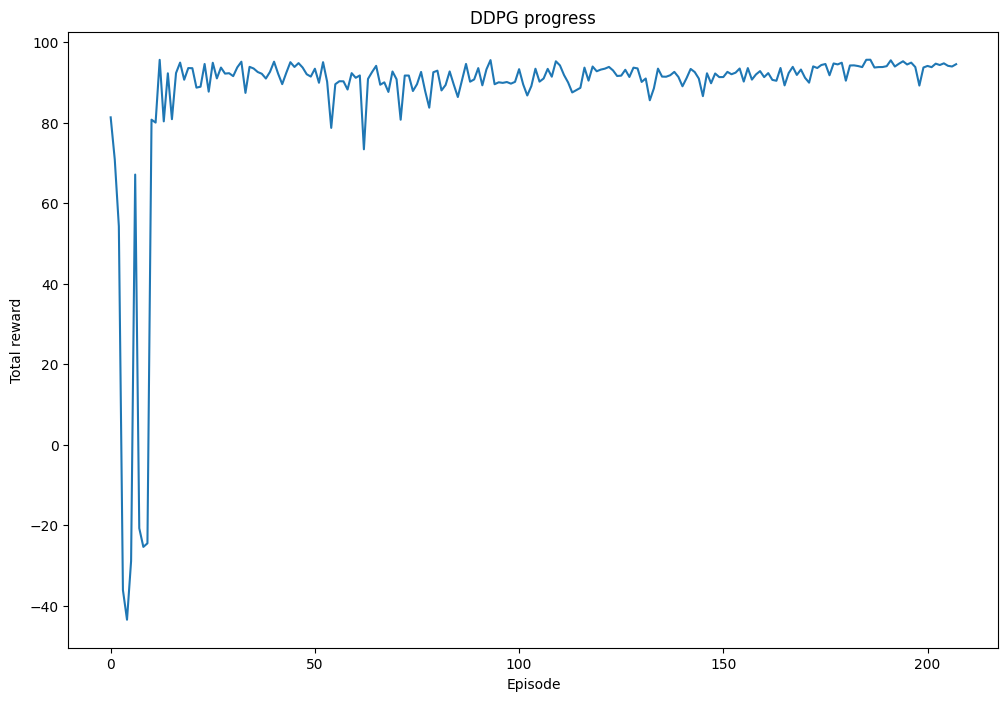

In [ ]:
fig = plt.figure(figsize=(12, 8))
plt.plot(scores)
plt.title('DDPG progress')
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.show()
fig.savefig('images/DDPG total rewards', dpi=600)

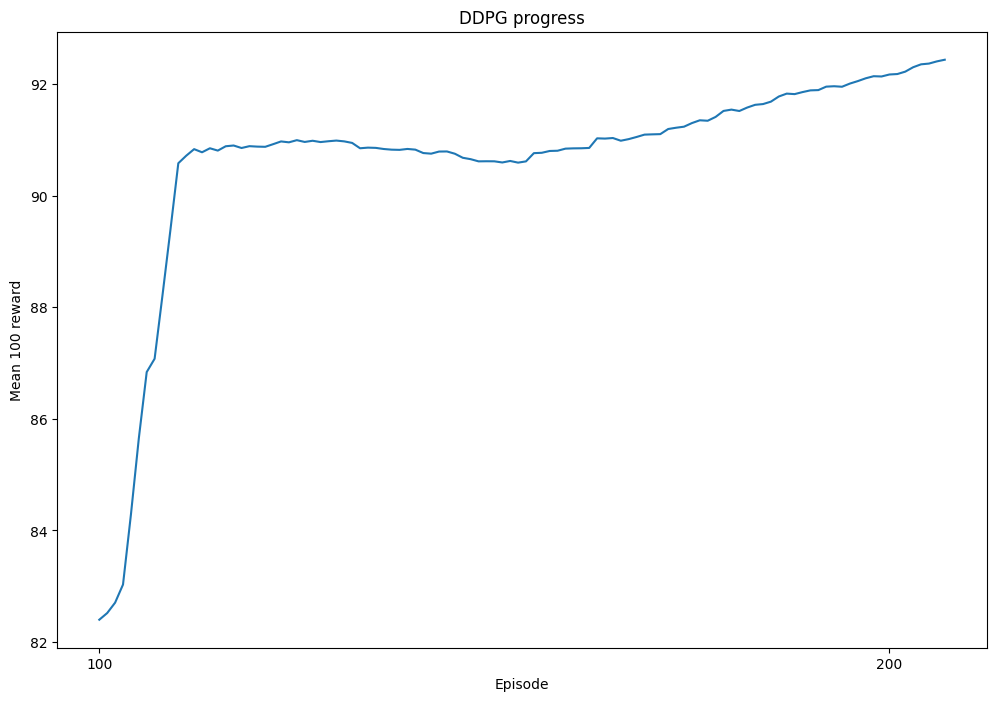

In [ ]:
N = 100
mean_rewards = running_mean(scores, N)

fig = plt.figure(figsize=(12, 8))
plt.plot(range(N, len(mean_rewards) + N), mean_rewards)
plt.title('DDPG progress')
plt.xlabel('Episode')
plt.xticks(np.arange(N, len(mean_rewards) + N + 1, 100))
plt.ylabel(f'Mean {N} reward')
plt.show()
fig.savefig('images/DDPG mean rewards', dpi=600)

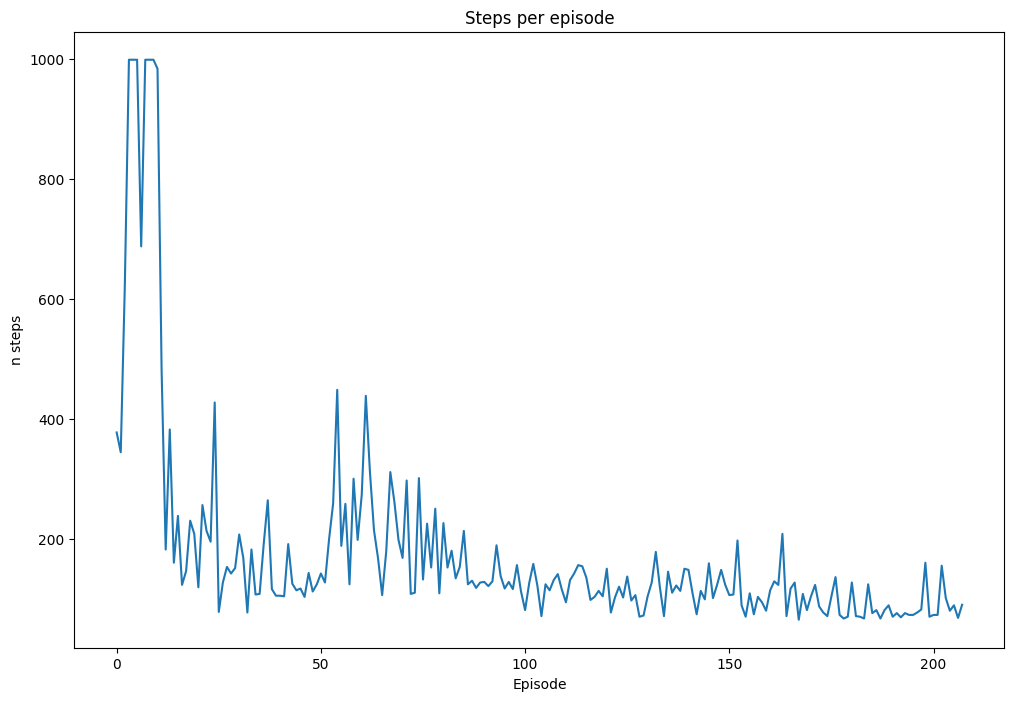

In [ ]:
fig = plt.figure(figsize=(12, 8))
plt.plot(steps)
plt.title('Steps per episode')
plt.xlabel('Episode')
plt.ylabel('n steps')
plt.show()
fig.savefig('images/Steps per episode', dpi=600)

In [ ]:
env = gym.make("MountainCarContinuous-v0", render_mode="rgb_array")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

agent = DDPGAgent(env, device)
load_agent(agent)

Agent's policy and critic networks loaded


In [ ]:
#rm -rf video/*

In [ ]:
s = env.reset(seed=7888)[0]

env = RecordVideo(env,
                  video_folder="video",
                  name_prefix="mount-car-cont-ddpg")

done = False
total_reward = 0

while not done:
    a = agent.choose_action(s, add_noise=False)
    s_next, r, done, _ = env.step([a])
    total_reward += r
    s = s_next

env.close()
print(f'Total reward for a trained agent: {total_reward}')

Total reward for a trained agent: 93.19879859975389
